In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import datetime as dt
from sklearn.impute import KNNImputer

In [302]:
df_plants = pd.read_excel('Data.xlsx',sheet_name='plants')
df_flight = pd.read_excel('Data.xlsx',sheet_name='flight dates') 
df_planting = pd.read_excel('Data.xlsx',sheet_name='planting')
df_weather = pd.read_excel('Data.xlsx',sheet_name='weather') 

In [303]:
df_planting.shape

(2373, 10)

In [306]:
df_planting.isnull().sum(axis = 0)

Crop               420
Column2           2373
Column3           2373
Plant_Date         420
Column1           2373
Region             420
Column4           2373
Planting_Batch     551
Volume_Planted     552
Planting_Wk        420
dtype: int64

In [310]:
df_planting_cp = df_planting[df_planting['Planting_Batch'].notna()]
df_planting_cp.dropna(axis=1, how='all',inplace=True)
df_planting_cp.dropna(axis=0,inplace=True)
#df_planting_cp.drop(['Column2','Column3','Column1','Column4'], inplace=True, axis=1)
#df_planting.drop(df_planting.index[1822:],inplace=True)

In [311]:
df_planting_cp.isnull().sum(axis=0)

Crop              0
Plant_Date        0
Region            0
Planting_Batch    0
Volume_Planted    0
Planting_Wk       0
dtype: int64

In [294]:
#df_planting_cp=df_planting_cp[df_planting_cp['Volume_Planted'].notna()]

In [312]:
df_plants.dtypes

Batch Number                     int64
Plant Date              datetime64[ns]
Class                            int64
Fresh Weight (g)               float64
Head Weight (g)                float64
Radial Diameter (mm)           float64
Polar Diameter (mm)            float64
Diameter Ratio                 float64
Leaves                         float64
Density (kg/L)                 float64
Leaf Area (cm^2)               float64
Square ID                        int64
Check Date              datetime64[ns]
Flight Date             datetime64[ns]
Remove                          object
dtype: object

In [313]:
df_plants.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN


In [316]:
df_flight.shape

(50, 2)

In [324]:
df_flight.head()

,Batch Number,Flight Date
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01


In [325]:
df_flight_cp = df_flight.copy()
df_flight_cp.columns = df_flight_cp.columns.str.replace(' ','_')

In [326]:
df_flight_cp.dropna(axis=1, how='all',inplace=True)
df_flight_cp.dropna(axis=0,inplace=True)

In [327]:
df_flight_cp.isnull().sum(axis = 0)

Batch_Number    0
Flight_Date     0
dtype: int64

In [ ]:
##weather data pre-processing

In [321]:
df_weather.head()

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2


In [341]:
df_weather.shape

(2556, 14)

In [331]:
df_weather.describe()

,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2553.000000,2510.000000,2490.000000
mean,108.509781,1.510720,2.699022,5.709703,6792.417058,187.359155,10.654112,15.463826,5.816236,85.922707,7.957188,4.882789,1.815542
std,84.820065,4.291076,1.582493,2.347790,61.085675,335.230723,5.501036,6.832950,5.050598,11.010210,4.582318,4.551633,1.319795
min,0.000000,0.000000,0.000000,0.000000,6572.000000,0.000000,-4.640000,-2.760000,-7.550000,0.000000,-6.400000,-14.500000,0.100000
25%,34.000000,0.000000,1.500000,4.100000,6756.000000,0.000000,6.497500,10.275000,2.097500,78.370000,4.400000,1.000000,0.700000
50%,85.000000,0.200000,2.400000,5.300000,6776.000000,0.000000,10.410000,14.615000,5.700000,86.865000,7.900000,4.700000,1.500000
75%,169.000000,1.200000,3.600000,7.000000,6816.000000,251.250000,15.030000,20.545000,9.662500,95.160000,11.500000,8.300000,2.800000
max,382.000000,117.400000,10.300000,18.100000,7176.000000,1440.000000,27.230000,39.690000,23.370000,100.000000,20.200000,18.400000,7.600000


In [ ]:
## plants dataset pre-processing

In [332]:
df_plants.shape

(4859, 15)

In [333]:
df_plants.isnull().sum(axis = 0)

Batch Number               0
Plant Date               174
Class                      0
Fresh Weight (g)           1
Head Weight (g)          105
Radial Diameter (mm)     105
Polar Diameter (mm)      105
Diameter Ratio           107
Leaves                  4759
Density (kg/L)           187
Leaf Area (cm^2)           2
Square ID                  0
Check Date                 0
Flight Date             4387
Remove                  4789
dtype: int64

In [334]:
df_plants.nunique()

Batch Number              64
Plant Date                37
Class                      5
Fresh Weight (g)        1133
Head Weight (g)          697
Radial Diameter (mm)     160
Polar Diameter (mm)      152
Diameter Ratio          1082
Leaves                    19
Density (kg/L)          3650
Leaf Area (cm^2)         925
Square ID                171
Check Date                63
Flight Date                3
Remove                     1
dtype: int64

In [335]:
df_planting.head()

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,2020-02-06 00:00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2020-02-08 00:00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2020-02-10 00:00:00,NaN,0.0,NaN,770,13944.0,7.0


In [336]:
df_plants_cp = df_plants.copy()
df_plants_cp.shape

(4859, 15)

In [236]:
df_plants_cp.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN


In [337]:
df_plants_cp.columns = df_plants_cp.columns.str.replace(' ','_')

In [338]:
df_plants_cp.head()

,Batch_Number,Plant_Date,Class,Fresh_Weight_(g),Head_Weight_(g),Radial_Diameter_(mm),Polar_Diameter_(mm),Diameter_Ratio,Leaves,Density_(kg/L),Leaf_Area_(cm^2),Square_ID,Check_Date,Flight_Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN


In [239]:
df_plants_cp['Crop']=0
df_plants_cp['Region']=0
df_plants_cp['Volume_Planted']=0
df_plants_cp['Planting_Wk']=0
for i in range(len(df_plants_cp)):
    d = df_plants_cp['Batch_Number'].iloc[i]
    if pd.isna(df_plants_cp['Flight_Date'].iloc[i]):
        if d in df_flight_cp['Batch_Number'].values:
            df_plants_cp.at[i,'Flight_Date']=df_flight_cp.loc[df_flight_cp.Batch_Number == d,'Flight_Date'].values[0]
    if pd.isna(df_plants_cp['Plant_Date'].iloc[i]):
        if d in df_planting['Planting_Batch'].values:
            df_plants_cp.at[i,'Plant_Date']=df_planting.loc[df_planting.Planting_Batch == d,'Plant_Date'].values[0]
            
    if d in df_planting['Planting_Batch'].values:
        df_plants_cp.at[i,'Crop']=df_planting.loc[df_planting.Planting_Batch == d,'Crop'].values[0]
        df_plants_cp.at[i,'Region']=df_planting.loc[df_planting.Planting_Batch == d,'Region'].values[0]
        df_plants_cp.at[i,'Volume_Planted']=df_planting.loc[df_planting.Planting_Batch == d,'Volume_Planted'].values[0]
        df_plants_cp.at[i,'Planting_Wk']=df_planting.loc[df_planting.Planting_Batch == d,'Planting_Wk'].values[0]

In [339]:
df_plants_cp.shape

(4859, 15)

In [340]:
df_plants_cp.isnull().sum(axis = 0)

Batch_Number               0
Plant_Date               174
Class                      0
Fresh_Weight_(g)           1
Head_Weight_(g)          105
Radial_Diameter_(mm)     105
Polar_Diameter_(mm)      105
Diameter_Ratio           107
Leaves                  4759
Density_(kg/L)           187
Leaf_Area_(cm^2)           2
Square_ID                  0
Check_Date                 0
Flight_Date             4387
Remove                  4789
dtype: int64

In [242]:
df_plants_cp['days_to_check'] = df_plants_cp['Flight_Date']-df_plants_cp['Plant_Date']
df_plants_cp

,Batch_Number,Plant_Date,Class,Fresh_Weight_(g),Head_Weight_(g),Radial_Diameter_(mm),Polar_Diameter_(mm),Diameter_Ratio,Leaves,Density_(kg/L),Leaf_Area_(cm^2),Square_ID,Check_Date,Flight_Date,Remove,Crop,Region,Volume_Planted,Planting_Wk,days_to_check
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,2020-04-30,NaN,3,0,155232,15,19 days
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,2020-04-30,NaN,3,0,155232,15,19 days
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,2020-04-30,NaN,3,0,155232,15,19 days
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,2020-04-30,NaN,3,0,155232,15,19 days
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,2020-04-30,NaN,3,0,155232,15,19 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,2020-10-20,NaT,NaN,3,0,265608,35,NaT
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,2020-10-20,NaT,NaN,3,0,265608,35,NaT
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,2020-10-20,NaT,NaN,3,0,265608,35,NaT
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,2020-10-20,NaT,NaN,3,0,265608,35,NaT


In [244]:
df_plants_cp = df_plants_cp[df_plants_cp.Remove != 'r']
df_plants_cp.drop('Remove', inplace=True, axis=1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [245]:
#df_plants_cp.to_excel("output.xlsx")

In [246]:
df_plants_cp.describe()

,Batch_Number,Class,Fresh_Weight_(g),Head_Weight_(g),Radial_Diameter_(mm),Polar_Diameter_(mm),Diameter_Ratio,Leaves,Density_(kg/L),Leaf_Area_(cm^2),Square_ID,Crop,Region,Volume_Planted,Planting_Wk,days_to_check
count,4789.000000,4789.000000,4788.000000,4684.000000,4684.000000,4684.000000,4682.000000,100.000000,4602.000000,4787.000000,4789.000000,4789.0,4789.0,4789.000000,4789.000000,3334
mean,622.812696,2.970558,471.527074,182.992955,100.161187,97.231853,1.007462,17.070000,0.245233,497.792772,398.233034,3.0,0.0,194241.747338,28.634162,31 days 23:18:06.262747450
std,92.948267,1.424723,296.590346,187.813480,41.961920,34.188622,0.200312,28.063512,0.287627,211.967256,410.501347,0.0,0.0,84536.999547,5.168810,8 days 17:34:19.911176868
min,402.000000,1.000000,0.632000,0.000000,0.000000,0.000000,0.240000,7.000000,0.014551,67.000000,4.000000,3.0,0.0,36288.000000,15.000000,6 days 00:00:00
25%,582.000000,2.000000,230.000000,27.000000,66.000000,72.000000,0.902524,8.000000,0.159952,340.000000,94.000000,3.0,0.0,115920.000000,26.000000,30 days 00:00:00
50%,647.000000,3.000000,430.000000,113.000000,110.000000,100.000000,1.027588,9.500000,0.215056,474.000000,247.000000,3.0,0.0,179256.000000,30.000000,33 days 00:00:00
75%,698.000000,4.000000,680.250000,305.000000,135.000000,125.000000,1.142857,12.500000,0.287347,621.000000,529.000000,3.0,0.0,266112.000000,33.000000,37 days 00:00:00
max,739.000000,5.000000,1978.000000,998.000000,185.000000,188.000000,2.264151,160.000000,15.278875,1305.000000,2019.000000,3.0,0.0,398328.000000,35.000000,48 days 00:00:00


In [227]:
#ax2 = df_plants_cp.plot.scatter(x='Flight_Date',y='Fresh_Weight_(g)',s=10,c='Batch_Number',colormap='viridis')

<AxesSubplot:xlabel='Flight_Date', ylabel='Fresh_Weight_(g)'>

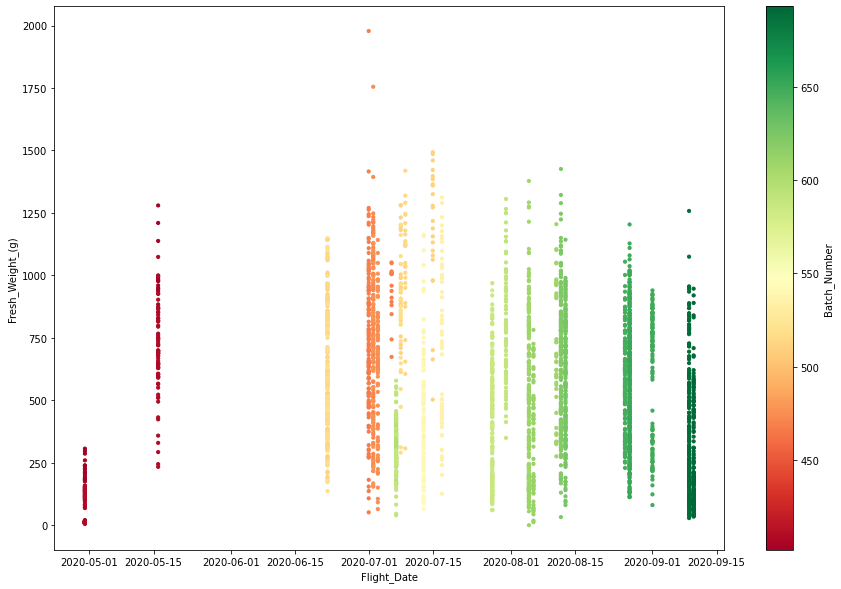

In [247]:
fig, ax = plt.subplots()
df_plants_cp.plot(kind='scatter', x='Flight_Date', y='Fresh_Weight_(g)', s=10, c='Batch_Number', cmap='RdYlGn', ax=ax,figsize=(15,10)) 

In [234]:
df_plants_cp.isnull().sum(axis = 0)

Batch_Number               0
Plant_Date                 0
Class                      0
Fresh_Weight_(g)           0
Head_Weight_(g)          105
Radial_Diameter_(mm)     105
Polar_Diameter_(mm)      105
Diameter_Ratio           107
Leaves                  4689
Density_(kg/L)             0
Leaf_Area_(cm^2)           0
Square_ID                  0
Check_Date                 0
Flight_Date             1455
Crop                       0
Region                     0
Volume_Planted             0
Planting_Wk                0
days_to_check           1455
dtype: int64

In [248]:
df_plants_cp['Density_(kg/L)'].fillna((df_plants_cp['Density_(kg/L)'].mean()), inplace=True)
df_plants_cp['Leaf_Area_(cm^2)'].fillna((df_plants_cp['Leaf_Area_(cm^2)'].mean()), inplace=True)
df_plants_cp['Fresh_Weight_(g)'].fillna((df_plants_cp['Fresh_Weight_(g)'].mean()), inplace=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [249]:
df_plants_cp.describe()

,Batch_Number,Class,Fresh_Weight_(g),Head_Weight_(g),Radial_Diameter_(mm),Polar_Diameter_(mm),Diameter_Ratio,Leaves,Density_(kg/L),Leaf_Area_(cm^2),Square_ID,Crop,Region,Volume_Planted,Planting_Wk,days_to_check
count,4789.000000,4789.000000,4789.000000,4684.000000,4684.000000,4684.000000,4682.000000,100.000000,4789.000000,4789.000000,4789.000000,4789.0,4789.0,4789.000000,4789.000000,3334
mean,622.812696,2.970558,471.527074,182.992955,100.161187,97.231853,1.007462,17.070000,0.245233,497.792772,398.233034,3.0,0.0,194241.747338,28.634162,31 days 23:18:06.262747450
std,92.948267,1.424723,296.559372,187.813480,41.961920,34.188622,0.200312,28.063512,0.281954,211.922981,410.501347,0.0,0.0,84536.999547,5.168810,8 days 17:34:19.911176868
min,402.000000,1.000000,0.632000,0.000000,0.000000,0.000000,0.240000,7.000000,0.014551,67.000000,4.000000,3.0,0.0,36288.000000,15.000000,6 days 00:00:00
25%,582.000000,2.000000,230.000000,27.000000,66.000000,72.000000,0.902524,8.000000,0.162098,340.000000,94.000000,3.0,0.0,115920.000000,26.000000,30 days 00:00:00
50%,647.000000,3.000000,430.000000,113.000000,110.000000,100.000000,1.027588,9.500000,0.220736,474.000000,247.000000,3.0,0.0,179256.000000,30.000000,33 days 00:00:00
75%,698.000000,4.000000,680.000000,305.000000,135.000000,125.000000,1.142857,12.500000,0.283351,621.000000,529.000000,3.0,0.0,266112.000000,33.000000,37 days 00:00:00
max,739.000000,5.000000,1978.000000,998.000000,185.000000,188.000000,2.264151,160.000000,15.278875,1305.000000,2019.000000,3.0,0.0,398328.000000,35.000000,48 days 00:00:00


In [252]:
df_plants_cp.isnull().sum(axis = 0)

Batch_Number               0
Plant_Date                 0
Class                      0
Fresh_Weight_(g)           0
Head_Weight_(g)          105
Radial_Diameter_(mm)     105
Polar_Diameter_(mm)      105
Diameter_Ratio           107
Leaves                  4689
Density_(kg/L)             0
Leaf_Area_(cm^2)           0
Square_ID                  0
Check_Date                 0
Flight_Date             1455
Crop                       0
Region                     0
Volume_Planted             0
Planting_Wk                0
days_to_check              0
dtype: int64

In [251]:
df_plants_cp['days_to_check'].fillna((df_plants_cp['days_to_check'].mean()), inplace=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [255]:
df_plants_cp.drop(columns=['Crop', 'Region','Class'],inplace=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [257]:
df_plants_cp.head()

,Batch_Number,Plant_Date,Fresh_Weight_(g),Head_Weight_(g),Radial_Diameter_(mm),Polar_Diameter_(mm),Diameter_Ratio,Leaves,Density_(kg/L),Leaf_Area_(cm^2),Square_ID,Check_Date,Flight_Date,Volume_Planted,Planting_Wk,days_to_check
0,402,2020-04-11,15.0,NaN,NaN,NaN,NaN,10.0,0.245233,185.0,208,2020-04-30,2020-04-30,155232,15,19 days
1,402,2020-04-11,15.0,NaN,NaN,NaN,NaN,11.0,0.245233,156.0,208,2020-04-30,2020-04-30,155232,15,19 days
2,402,2020-04-11,16.0,NaN,NaN,NaN,NaN,12.0,0.245233,137.0,208,2020-04-30,2020-04-30,155232,15,19 days
3,402,2020-04-11,15.0,NaN,NaN,NaN,NaN,10.0,0.245233,225.0,208,2020-04-30,2020-04-30,155232,15,19 days
4,402,2020-04-11,15.0,NaN,NaN,NaN,NaN,11.0,0.245233,157.0,208,2020-04-30,2020-04-30,155232,15,19 days


In [352]:
df_plants_dict=df_plants_cp.copy()
df_weather_cp = df_weather.copy()

In [354]:
df_plants_dict=df_plants_dict.join(df_weather_cp)

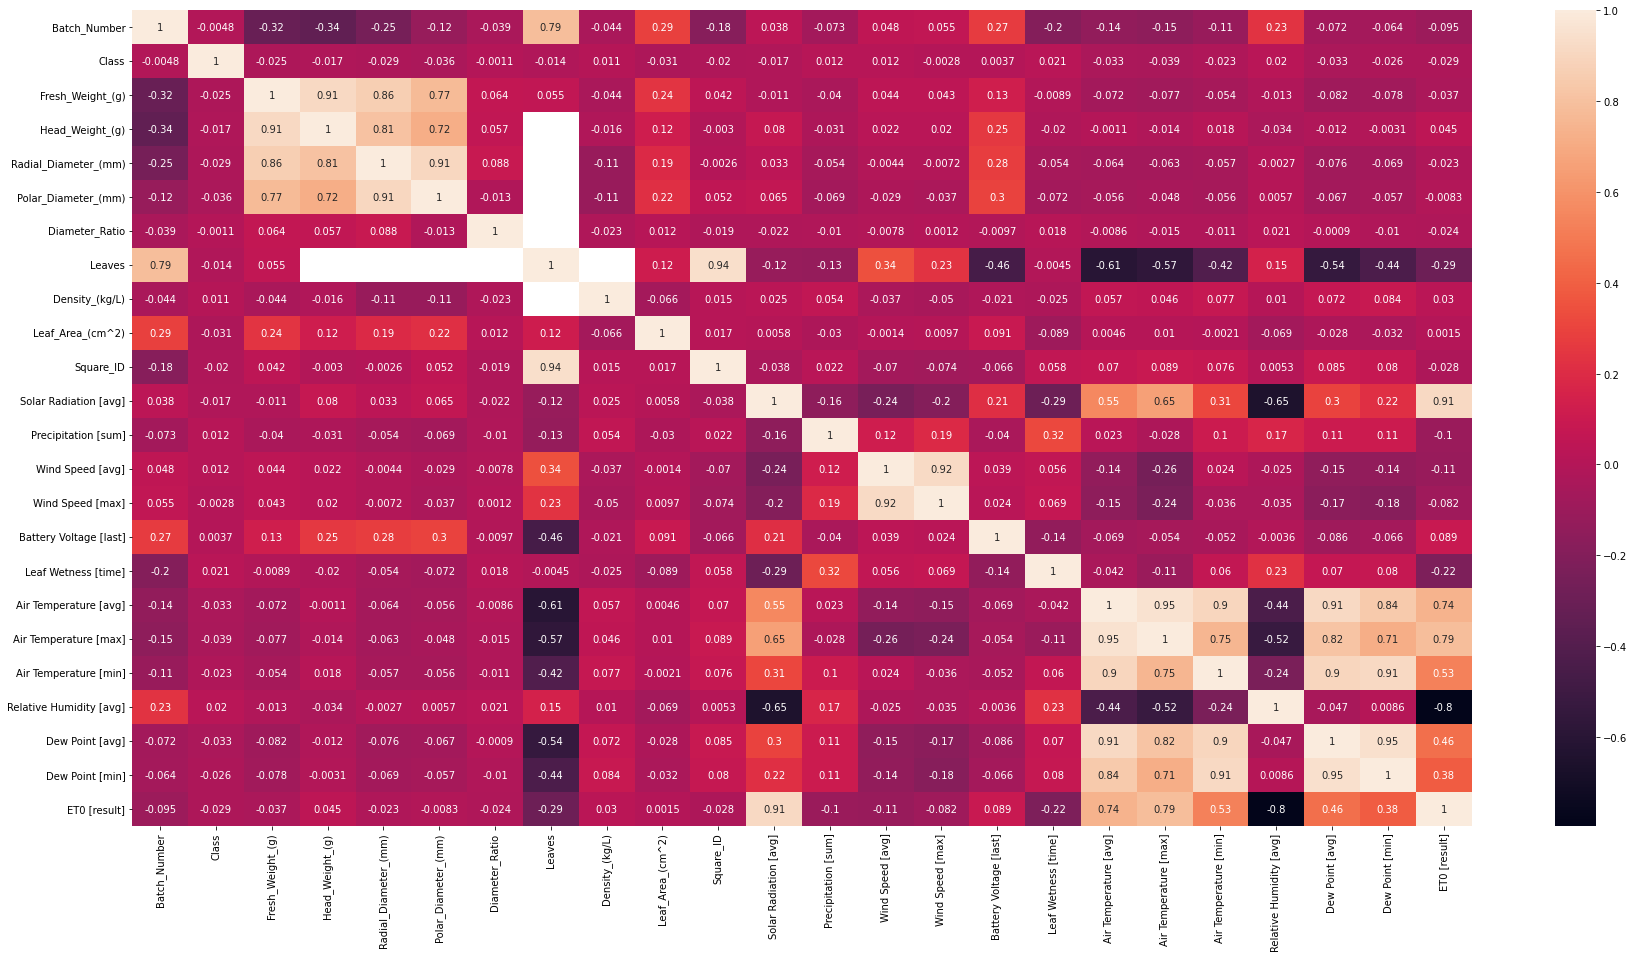

In [356]:
plt.figure(figsize=(30,15))
correlation=df_plants_dict.corr()
fig = sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [359]:
figure = fig.get_figure()    
figure.savefig('fulldataset.png', dpi=500)